# 1. Importing data and libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Importing the Federal Reserve Economic Data "Real Retail and Food Services Sales" variable.

data = quandl.get('FRED/RRSFS')

In [5]:
data.head(5)

,Value
Date,
1992-01-01,118651.0
1992-02-01,118480.0
1992-03-01,117700.0
1992-04-01,118156.0
1992-05-01,118548.0


In [6]:
data.shape

(361, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

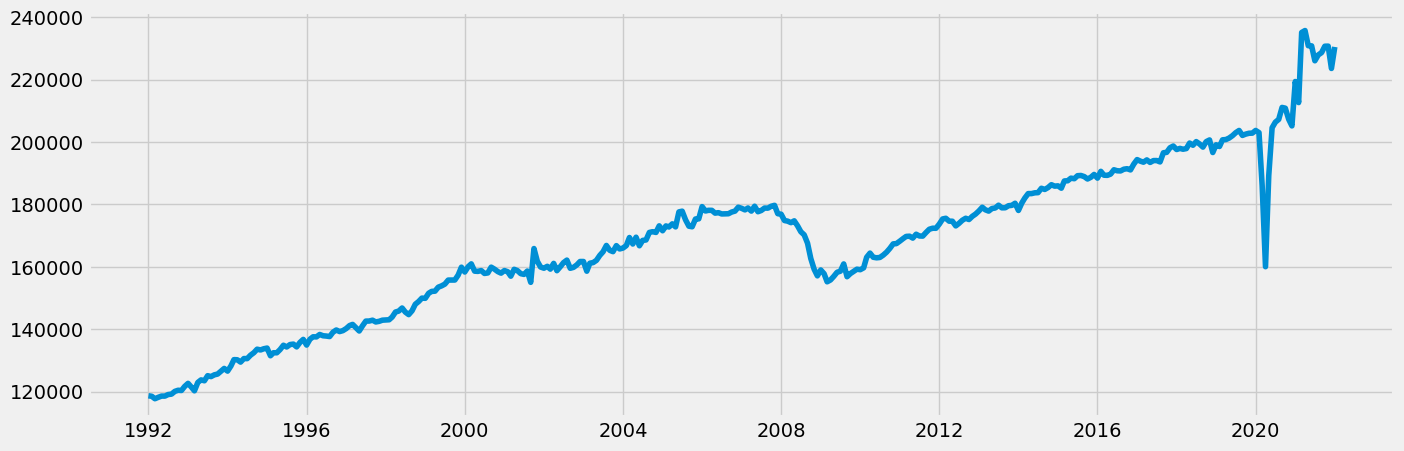

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

The data requires no subsetting because the year range available is perfect for the analysis

Check for missing values

In [10]:
data.isnull().sum()

Value    0
dtype: int64

In [11]:
#check for duplicates

dups = data.duplicated()
dups.sum()

1

In [12]:
dups.shape

(361,)

In [13]:
data.duplicated()

Date
1992-01-01    False
1992-02-01    False
1992-03-01    False
1992-04-01    False
1992-05-01    False
              ...  
2021-09-01    False
2021-10-01    False
2021-11-01    False
2021-12-01    False
2022-01-01    False
Length: 361, dtype: bool

# 2. Time series analysis- decomposition

In [15]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [16]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

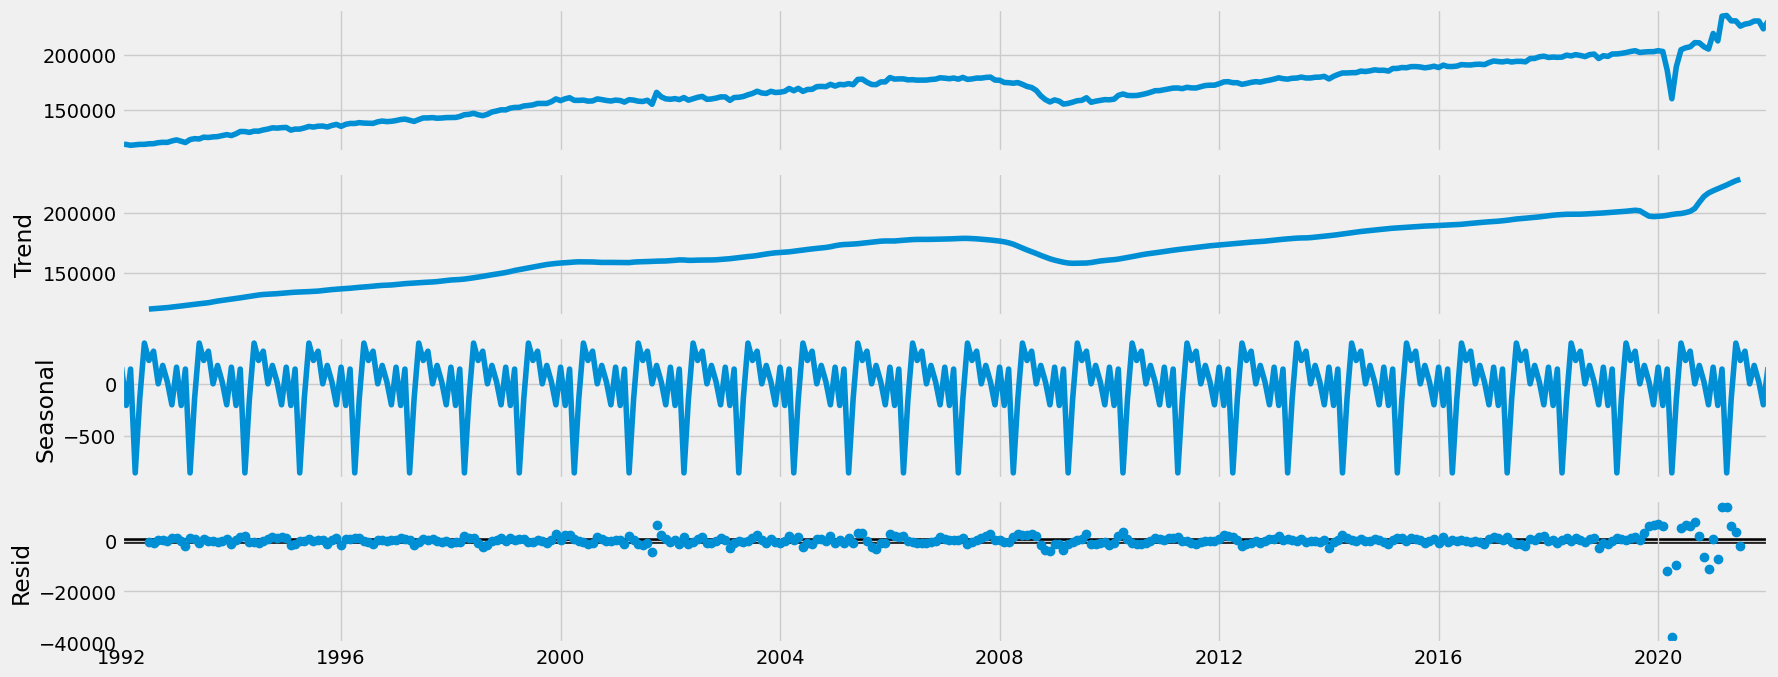

In [17]:
# Plot the separate components

decomposition.plot()
plt.show()

The first chart shows the data itself which indicates there is not much noise and no need for smoothing because the level and the trend is similar with little or no difference.

the trend rises in a linear fashion and despise a drop between 2008- 2009 it continued to rise then experience a fluctaution in 2019 but continued to rise which shows a dominant trend.

the third chart which represents the seasonality  comprises of fluctuations represented by curves on a regular interval indicates there is seasonality in the data.

Residual is what is left after separating trend and seasonality, the presence of trend and seasonality means that the series is non-stationary.

# 3. Testing for stationarity

In [18]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.314133
p-value                          0.923479
Number of Lags Used             14.000000
Number of Observations Used    346.000000
Critical Value (1%)             -3.449392
Critical Value (5%)             -2.869930
Critical Value (10%)            -2.571240
dtype: float64


the critical value(5%) is smaller than the test statistic which means there is a unit root and the data is non-stationary.

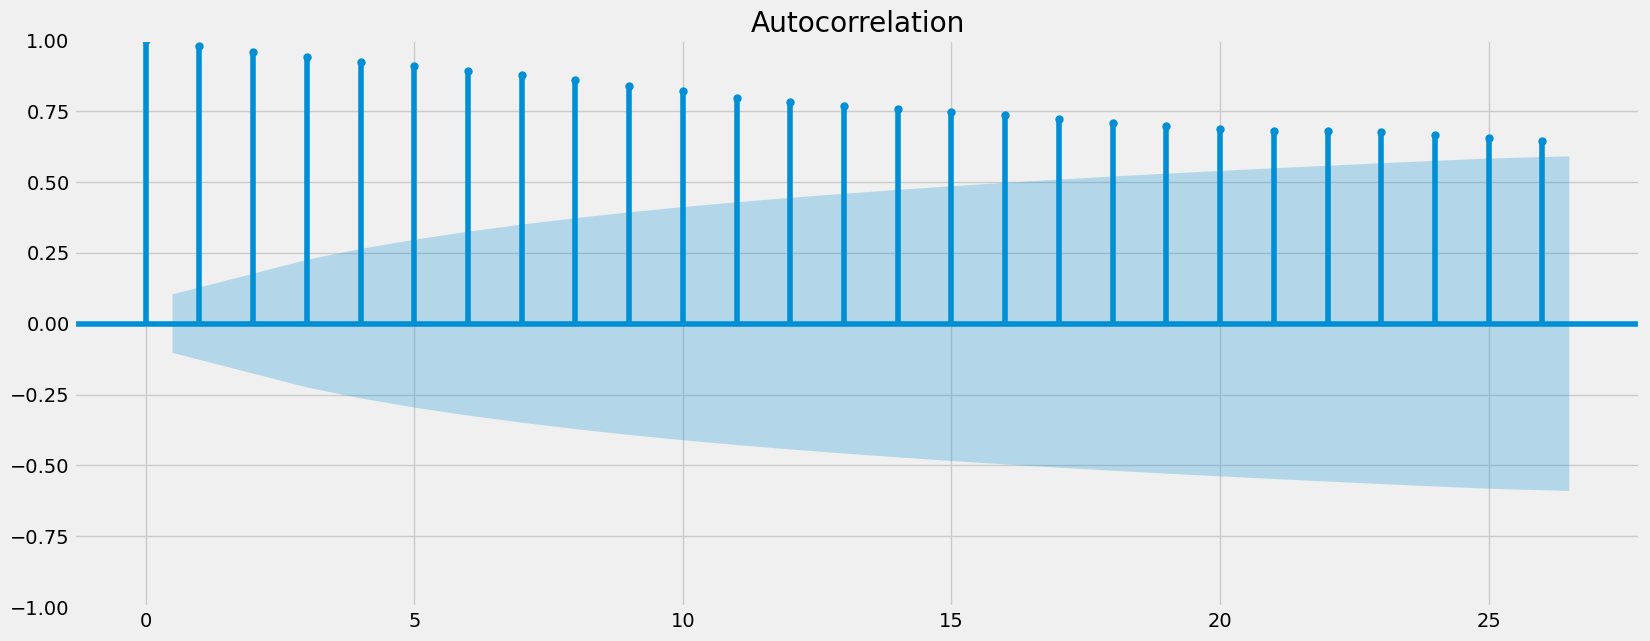

In [19]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

# 4. Stationarizing data

In [20]:
data_diff = data - data.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [21]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [22]:
data_diff.head()

,Value
Date,
1992-02-01,-171.0
1992-03-01,-780.0
1992-04-01,456.0
1992-05-01,392.0
1992-06-01,-6.0


In [23]:
data_diff.columns

Index(['Value'], dtype='object')

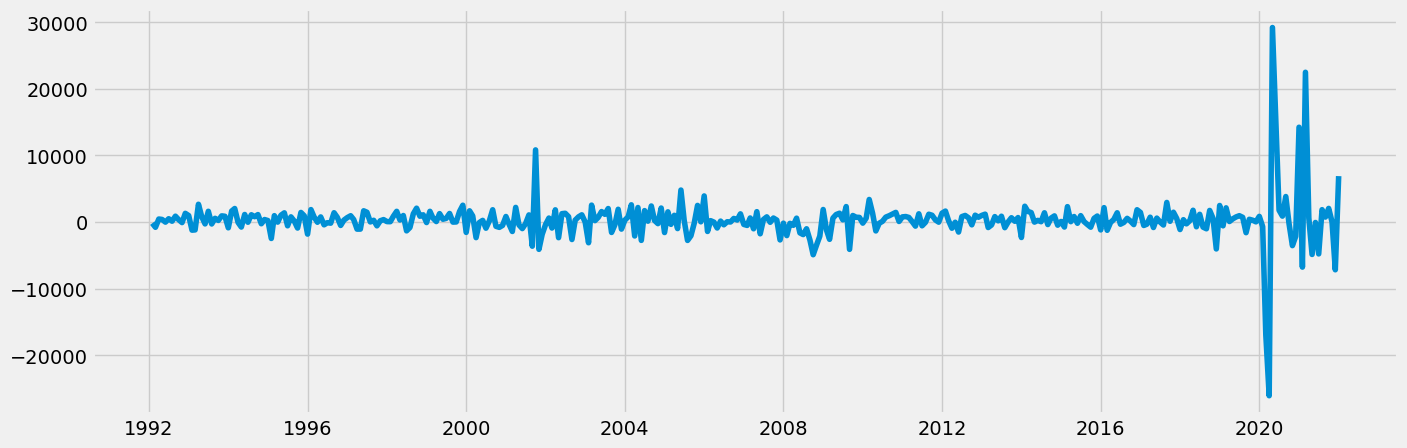

In [24]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [25]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.542685
p-value                          0.000002
Number of Lags Used             17.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


The test statistic is now smaller than the critical value of 5 & 10%

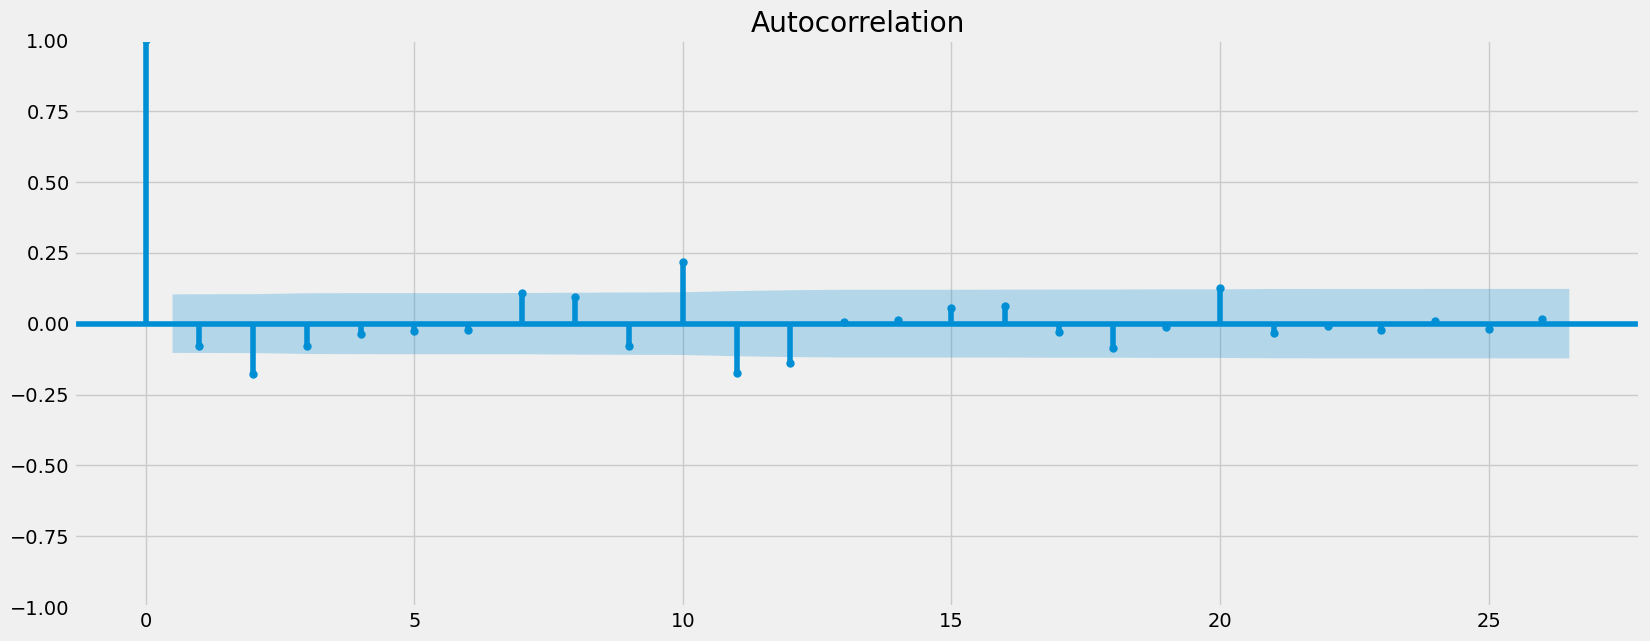

In [26]:
plot_acf(data_diff)
plt.show()

There are only but a few lags which means that we can stop here without need for another round of differencing.